What need:
1) Forward Problem: Solve the heat equation using FDM (Euler or Thomas methods) to find the temperature distribution u(x,T) at a later time T given the initial condition f(x).

2) Inverse Problem: Use the temperature distribution u(x,T) (which will be noisy) to recover the initial condition f(x) using Tikhonov regularization.


Forward Problem:
1. Implement forward problem calculation +
2. Add noise to u(x,T) fot further use in the Inverse Problem +
3. Plot noisy and real u(x,T) +

Inverse Problem:
1. Implement Inverse problem estimation using Tichonov regularization +
2. Play with different λ values +
3. Plot the true initial condition, and the recovered initial condition using Tikhonov regularization for comparison +

#### Euler method, keep in mind about CFL condition.

PS: "+" synbol it means I did it. Don't pay attention to it. This is done for my convenience

### Heat equation:
∂u(x,t) / ∂t = α * ( ∂^2^u(x,t) / ∂x^2^ ) + f(x, t)
f(x, t) - external influence
α - coefficient of thermal conductivity (constant)
u(x,t) - temperature at point x at time t
where x = [0, L], t = [0, T]

### Boundary condition:
u(0, t) = u(L, t) = 0 (when x = 0 and x = L temperature is equal to 0)

### Initial condition:
u(x, 0) = f(x) - so, i don't understand it normally (the temperature distribution f(x) along the rod at time t = 0)

### CMF condition:
 r = α * dt / dx^2^

### Spatial Diser:
 dx = L / n - 1,
 where n - amount of step in grid (or space)? or amount of points

### Time Diser:
 dt = T / m - 1 (I'm not sure about m - 1, think we don't need to subtract 1)




In [219]:
import numpy as np
import matplotlib.pyplot as plt

### In Lecture Given Parameters

In [220]:
T = 0.1 # time
L = 1.0 # lentgth
alpha = 0.01 # k / c * ro
noise_level = 0.01 # noise of order 10^-2
lambda_values = [0.0001, 0.01, 0.1, 1.0] # different lambda values

### Initial function:
    f(x) = sin(Pi * X)

In [221]:
def fun(x):
    return np.sin(np.pi * x)

### Grid Method:
construct the grid over the domain = (0, L) * (0, T)

In [222]:
Xn = 10
Tn = 10
dx = L / (Xn - 1) # step X (Horizontal)
dt = T / (Tn - 1) # step T (Vertical)

In [223]:
print(f"dx: {dx}, dt: {dt}")

dx: 0.1111111111111111, dt: 0.011111111111111112


In [224]:
r = alpha * dt / dx**2

### We need some condition for CMF (r):
1. We know, we have some grid and layers (time layers, horizontal layers)
2. Named this layers J

Formula of scheme Euler:
    J<sup>t + 1</sup><sub>i</sub> = J<sup>t</sup><sub>i</sub> + r (J<sup>t</sup><sub>i + 1</sub> - 2J<sup>t</sup><sub>i</sub> + J<sup>t</sup><sub>i - 1</sub>)

by CFL condition r <= 0.5
so



In [225]:
if r > 0.5:
    print("CFL condition not approved")
else:
    print(f"{r} < or = 0.5")

0.009000000000000001 < or = 0.5


### Construct grid

In [226]:
x = np.linspace(0, L, Xn) # from (0) to L, step = Xn (Horizontal axis)
t = np.linspace(0, T, Tn) # from (0) to T, step = Tn (Vertical axis)

In [227]:
x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [228]:
t

array([0.        , 0.01111111, 0.02222222, 0.03333333, 0.04444444,
       0.05555556, 0.06666667, 0.07777778, 0.08888889, 0.1       ])

### Example of future grid

Text(0.5, 0, 'X values')

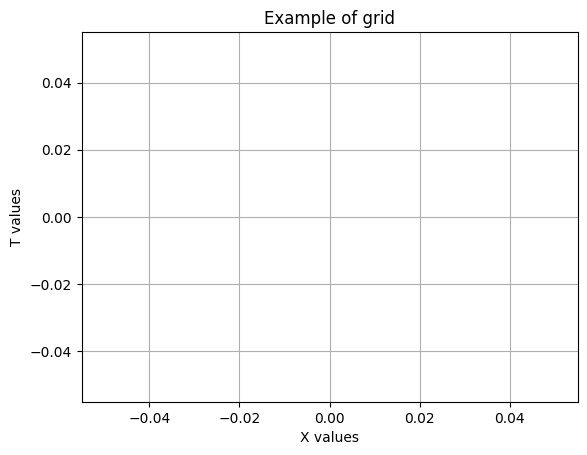

In [229]:
plt.plot()
plt.title("Example of grid")
plt.grid(visible=True)
plt.ylabel("T values")
plt.xlabel("X values")

In [230]:
# we need create a grid and put zeros to values in our grid
J = np.zeros((Tn, Xn)) # in this situation we create a grid with Xn amount of variables of X axis, and the same with Tn of Y axis

In [231]:
J

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [232]:
J[0, :] = fun(x)

In [233]:
J

array([[0.00000000e+00, 3.42020143e-01, 6.42787610e-01, 8.66025404e-01,
        9.84807753e-01, 9.84807753e-01, 8.66025404e-01, 6.42787610e-01,
        3.42020143e-01, 1.22464680e-16],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
   

### Using this Euler formula like i write earlier:
J<sup>t + 1</sup><sub>i</sub> = J<sup>t</sup><sub>i</sub> + r (J<sup>t</sup><sub>i + 1</sub> - 2J<sup>t</sup><sub>i</sub> + J<sup>t</sup><sub>i - 1</sub>)

In [234]:
for t in range(0, Tn-1):
    for i in range(1, Xn-1):
        J[t+1, i] = J[t, i] + r * (J[t, i-1] - 2*J[t, i] + J[t, i+1])

In [235]:
J # And we construct our grid

array([[0.00000000e+00, 3.42020143e-01, 6.42787610e-01, 8.66025404e-01,
        9.84807753e-01, 9.84807753e-01, 8.66025404e-01, 6.42787610e-01,
        3.42020143e-01, 1.22464680e-16],
       [0.00000000e+00, 3.41648869e-01, 6.42089843e-01, 8.65085305e-01,
        9.83738712e-01, 9.83738712e-01, 8.65085305e-01, 6.42089843e-01,
        3.41648869e-01, 0.00000000e+00],
       [0.00000000e+00, 3.41277998e-01, 6.41392833e-01, 8.64146226e-01,
        9.82670831e-01, 9.82670831e-01, 8.64146226e-01, 6.41392833e-01,
        3.41277998e-01, 0.00000000e+00],
       [0.00000000e+00, 3.40907530e-01, 6.40696580e-01, 8.63208167e-01,
        9.81604110e-01, 9.81604110e-01, 8.63208167e-01, 6.40696580e-01,
        3.40907530e-01, 0.00000000e+00],
       [0.00000000e+00, 3.40537463e-01, 6.40001083e-01, 8.62271126e-01,
        9.80538546e-01, 9.80538546e-01, 8.62271126e-01, 6.40001083e-01,
        3.40537463e-01, 0.00000000e+00],
       [0.00000000e+00, 3.40167799e-01, 6.39306341e-01, 8.61335103e-01,
   

### Add some noise:
    J_noisy = J(x, T) + noise
    where noise = 0.01 (Noise level) * some random numbers, but the amount like in Xn
    I multiply to some randoms numbers for some different numbers.
    How you said in Video of Lecture 2

In [236]:
J_noisy = J[-1, :] + noise_level * np.random.normal(size=Xn)
# J [-1, :] all X elements by last time of grid (last T Layer)

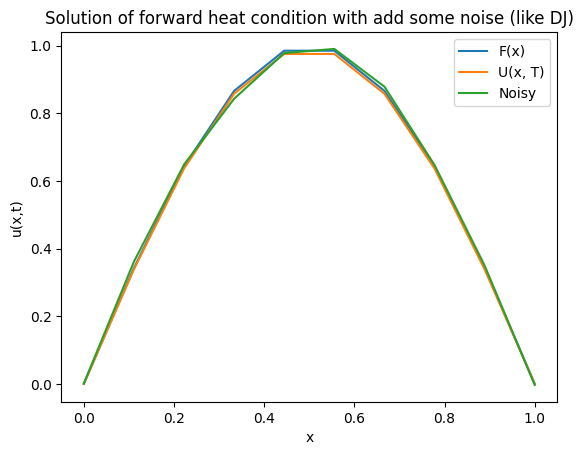

In [237]:
plt.plot(x, J[0, :], label="F(x)")
plt.plot(x, J[-1, :], label="U(x, T)")
plt.plot(x, J_noisy, label="Noisy")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Solution of forward heat condition with add some noise (like DJ)")
plt.legend()

### Now, Inverse

Tikhonov Regularization from lab_1

In [238]:
def tikhonov_regularization(A, y, L):
    AT = np.transpose(A)
    AT_A = np.matmul(AT, A)

    # add regularization parameter lambdaI
    AT_A += L * np.eye(AT_A.shape[0])  # lambdaI, like in this code we creating an identity matrix with size like AT_A matrix

    # (A^T * A + λI)^(-1)
    AT_A_inv = np.linalg.inv(AT_A)

    # (A^T * A + λI)^(-1) * A^T * y
    AT_y = np.matmul(AT, y)
    return np.matmul(AT_A_inv, AT_y)

### Create A Matrix and fill it

    | [1-2r] [  r ] [  0 ] [  0 ] [  0 ] |
    | [  r ] [1-2r] [  r ] [  0 ] [  0 ] |
    | [  0 ] [  r ] [1-2r] [  r ] [  0 ] |
    | [  0 ] [  0 ] [  r ] [1-2r] [  r ] |
    | [  0 ] [  0 ] [  0 ] [  r ] [1-2r] |

In [239]:
A = np.zeros((Xn, Xn))
A

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [240]:
np.fill_diagonal(A[1:, :], r)
A

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.009, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.009, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.009, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.009, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.009, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.009, 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.009, 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.009, 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.009,
        0.   ]])

In [241]:
np.fill_diagonal(A[:, 1:], r)
A

array([[0.   , 0.009, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.009, 0.   , 0.009, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.009, 0.   , 0.009, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.009, 0.   , 0.009, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.009, 0.   , 0.009, 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.009, 0.   , 0.009, 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.009, 0.   , 0.009, 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.009, 0.   , 0.009,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.009, 0.   ,
        0.009],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.009,
        0.   ]])

In [242]:
np.fill_diagonal(A, 1 - 2 * r)
A

array([[0.982, 0.009, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.009, 0.982, 0.009, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.009, 0.982, 0.009, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.009, 0.982, 0.009, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.009, 0.982, 0.009, 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.009, 0.982, 0.009, 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.009, 0.982, 0.009, 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.009, 0.982, 0.009,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.009, 0.982,
        0.009],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.009,
        0.982]])

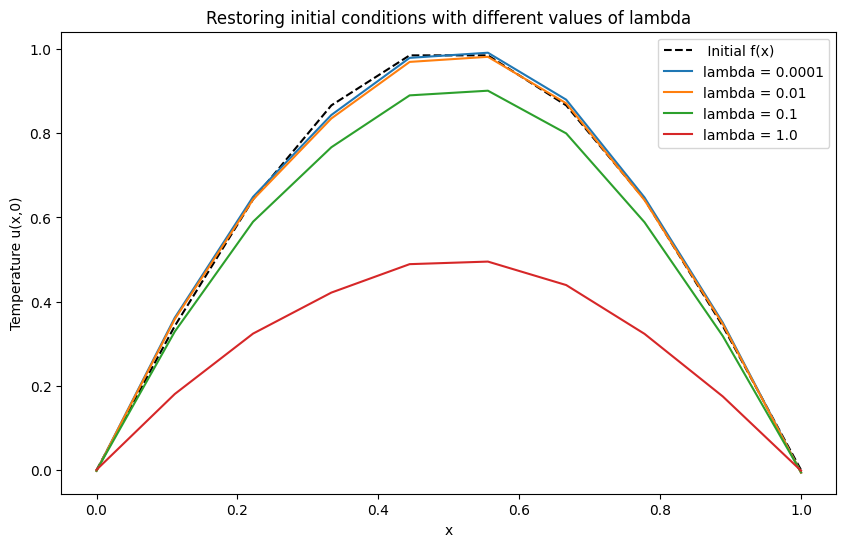

In [243]:
plt.figure(figsize=(10, 6)) # window for clearly plot and usability hehe
plt.plot(x, fun(x), label=" Initial f(x)", color='black', linestyle='--')

plt.xlabel("x")
plt.ylabel("Temperature u(x,0)")
plt.title("Restoring initial conditions with different values of lambda")

for L in lambda_values:
    regularized_function = tikhonov_regularization(A, J_noisy, L) # so we tried to repeat our initial function or condition
    plt.plot(x, regularized_function, label=f"lambda = {L}") # Plotting (and now i'm really tired to do this)

plt.legend()